In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kerastuner as kt
import tensorflow as tf
from keras.utils import plot_model

C:\Users\johnp\AppData\Local\Temp\ipykernel_7436\2319116898.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [58]:
#create dummy data create a small kerastuner lstm train the model and plot the loss history plot of the best model. Split the data into train and test 
#and plot the predictions of the test data.

# Create dummy data
def create_time_series():
    x = np.linspace(0, 30, 1000)
    y = np.sin(x) + np.random.normal(0, 0.1, 1000)
    return x, y

x, y = create_time_series()

# Create a small LSTM model
def model_builder(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), input_shape=(1, 1)))
    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

tuner = kt.Hyperband(model_builder, objective='val_loss', max_epochs=1, factor=3, directory='./my_dir', project_name='/intro_to_t',overwrite=True)
tuner.search(x.reshape(-1, 1, 1), y, epochs=10, validation_split=0.2)

best_model = tuner.get_best_models(1)[0]
best_model.summary()




Trial 1 Complete [00h 00m 04s]
val_loss: 0.711801290512085

Best val_loss So Far: 0.711801290512085
Total elapsed time: 00h 00m 04s


c:\Users\johnp\OneDrive\Υπολογιστής\IHU\Thesis\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 320)            │       412,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 453,377 (1.73 MB)

 Trainable params: 453,377 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
tuner_pred = model_tuner.predict(X)
model_pred = model.predict(X)

for i in range(len(tuner_pred)):
    print(tuner_pred[i], model_pred[i])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[1.4311385] [1.507212]
[1.4307417] [1.4307495]
[1.0399089] [1.0868531]
[0.9125539] [1.01003]
[0.72032535] [0.7593473]
[0.66879344] [0.73984087]
[1.071748] [1.1106156]
[1.0022143] [1.1370758]
[0.8522128] [0.8809859]
[1.0742543] [1.0754216]
[1.0380157] [1.1585971]
[1.4707257] [1.5302777]
[0.889637] [0.9768576]
[0.6100277] [0.6902502]
[0.65966225] [0.7126576]
[0.5133886] [0.5886873]
[1.14308] [1.2770258]
[1.0506103] [1.1675493]
[1.5015478] [1.5630265]
[1.1440053] [1.2394968]
[0.9153552] [1.0109806]
[0.942279] [0.9898246]
[1.3088626] [1.4195992]
[1.1665847] [1.2889794]
[1.0589831] [1.037687]
[1.2163923] [1.228937]
[1.09528] [1.1167524]
[1.3196754] [1.3752598]
[0.9170224] [0.9164399]
[0.7165625] [0.7737951]
[0.8973685] [0.9191703]
[1.0430475] [1.1603067]
[0.55856913] [0.65627563]
[1.3325846] [1.3560125]
[1.2703204] [1.3584706]
[0.950457] [1.0547843]
[1.124053] [1.1754289]
[1.4398518] [1.5181084]
[0.741987] [0.859803

In [14]:
from tensorflow.keras.utils import plot_model
import graphviz

In [18]:
import tensorflow as tf
from tensorflow.keras.utils import model_to_dot
from IPython.display import Image
import pydot

def plot_model_custom(model, to_file='./model.png', show_shapes=True, show_layer_names=True):
    dot = model_to_dot(model, show_shapes=show_shapes, show_layer_names=show_layer_names)
    (graph,) = pydot.graph_from_dot_data(dot.to_string())
    graph.write_png(to_file)
    return Image(to_file)

# Example usage
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(5,)),
    tf.keras.layers.Dense(1)
])
plot_model_custom(model)

c:\Users\johnp\OneDrive\Υπολογιστής\IHU\Thesis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


FileNotFoundError: [WinError 2] "dot" not found in path.

In [2]:
#from PIL import ImageFont
import visualkeras
from tensorflow.keras.models import load_model
model_cnn1 = load_model('models/cnn_1rst_88acc.h5')
model_cnn2 = load_model('models/cnn_daynight_89acc.h5')
model_lstm1 = load_model('models/lstm_model_89acc.h5')
model_lstm2 = load_model('models/lstm_daynight_90acc.h5')


In [15]:

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

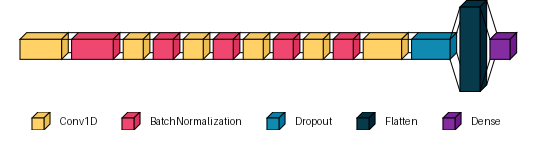

In [3]:
# inp_tuple = (len(model_cnn1.layers),model_cnn1.layers)
visualkeras.layered_view(model_cnn1, legend=True,scale_z=0.1,scale_xy=0.02,one_dim_orientation='y',padding=20)


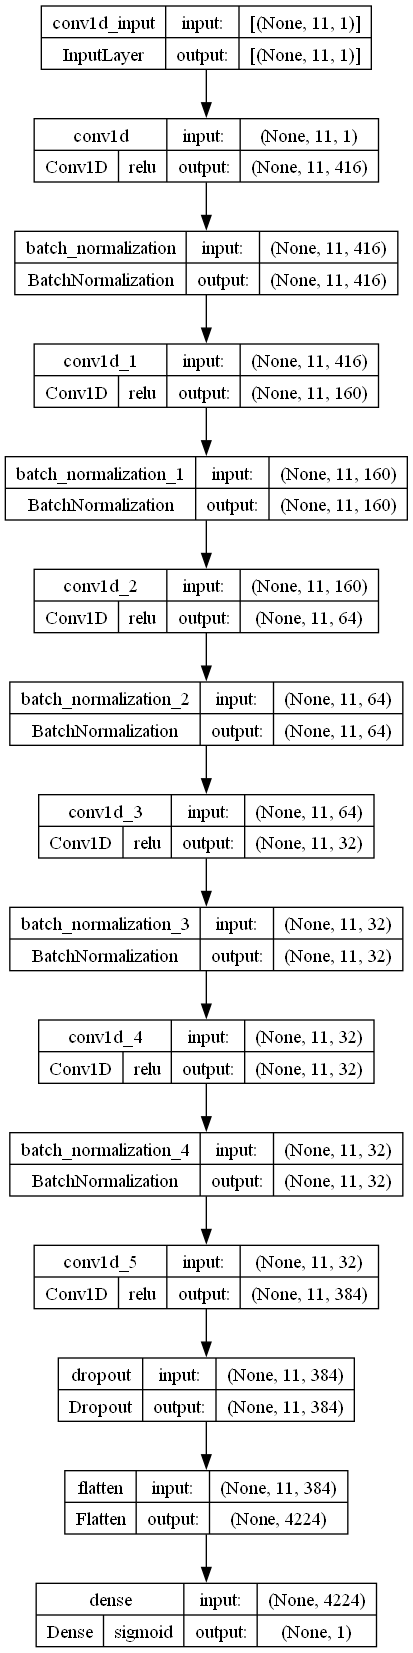

In [28]:
from keras.utils.vis_utils import plot_model 
plot_model(model_cnn1,show_shapes=True,show_layer_activations=True)

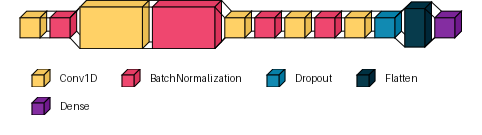

In [59]:
visualkeras.layered_view(model_cnn2, legend=True,scale_z=0.15,scale_xy=0.1,one_dim_orientation='y',padding=20)

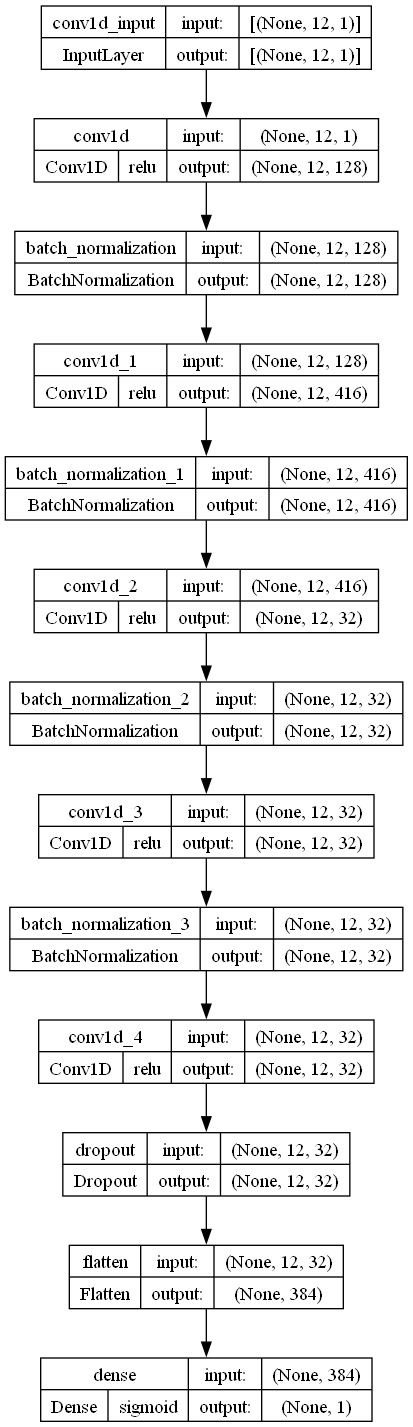

In [29]:
from keras.utils.vis_utils import plot_model 
plot_model(model_cnn2,show_shapes=True,show_layer_activations=True)

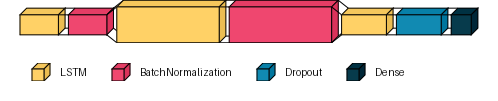

In [72]:
visualkeras.layered_view(model_lstm1, legend=True,scale_z=0.2,scale_xy=0.07,one_dim_orientation='y',padding=20)

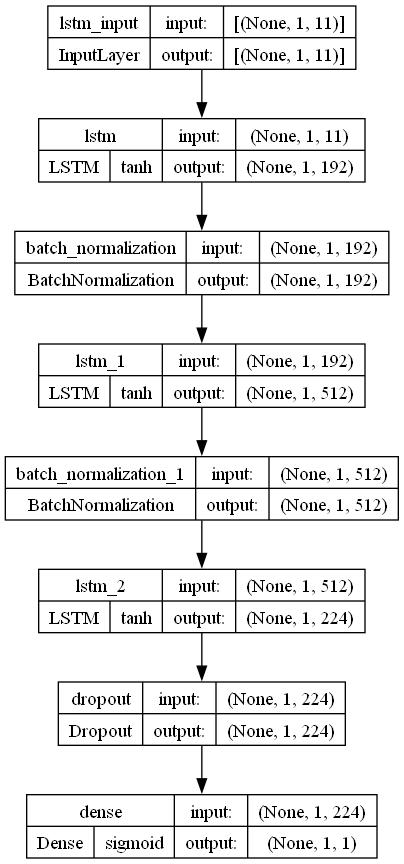

In [30]:
#plot model summary but not with .summary() method
from keras.utils.vis_utils import plot_model 
plot_model(model_lstm1,show_shapes=True,show_layer_activations=True)

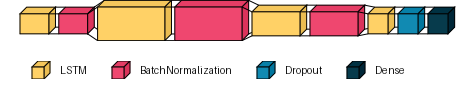

In [63]:
visualkeras.layered_view(model_lstm2, legend=True,scale_z=0.3,scale_xy=0.15,one_dim_orientation='y',padding=20)

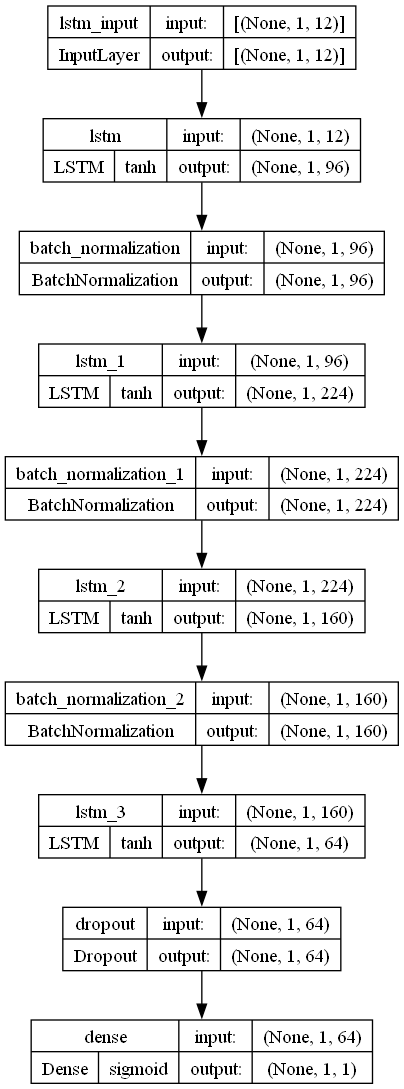

In [31]:
#plot model summary but not with .summary() method
from keras.utils.vis_utils import plot_model 
plot_model(model_lstm2,show_shapes=True,show_layer_activations=True)

In [75]:
model_cnn1.summary()
model_cnn2.summary()
model_lstm1.summary()
model_lstm2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 416)           832       
                                                                 
 batch_normalization (BatchN  (None, 11, 416)          1664      
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 160)           66720     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 160)          640       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 64)            10304     
                                                                 
 batch_normalization_2 (Batc  (None, 11, 64)           2